In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, NoNorm

Code to get evenly spaced colors. 

In [2]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    return [(int(i[:2], 16)/255.0, int(i[2:4], 16)/255.0, int(i[4:], 16)/255.0) for i in colors]

In [3]:
f = 'ilk-3b-1024.tif'
ds = Image.open(f)

In [4]:
img_array = np.array(ds)

In [5]:
img_array.shape

(1024, 1024, 3)

In [6]:
i, j = np.indices(img_array.shape[:2])
img_ind = np.r_["2,3,0", i, j, img_array]

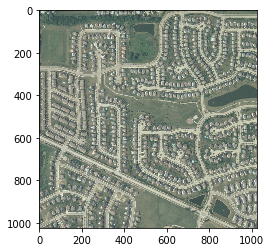

In [7]:
plt.imshow(img_array)

Reshaping the RGB image to a 2d array, since sk-learn takes 2d array as input for the fit function.

In [8]:
img = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

In [9]:
km2 = KMeans(5)
km2.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
out = np.reshape(np.array(km2.labels_), (1024, 1024))

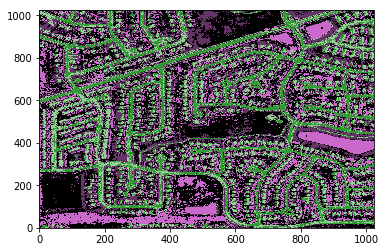

In [11]:
cmap = ListedColormap(get_spaced_colors(5))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

In [12]:
km10 = KMeans(10)
km10.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

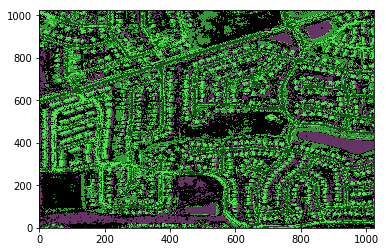

In [13]:
out10 = np.reshape(np.array(km10.labels_), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(10))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

This output shows that there is no significant increase in quality of output with an increase in number of clusters. The ideal number of clusters is somewhere near 5, with roads, water, houses, grass and forest.

In [14]:
img2 = img_ind.reshape((img_ind.shape[0] * img_ind.shape[1], 5))

In [15]:
km2.fit(img2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

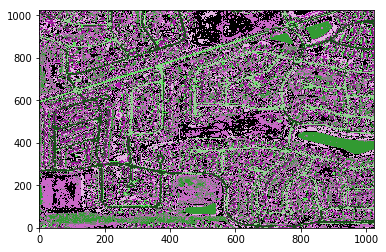

In [23]:
out = np.reshape(np.array(km2.labels_), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(10))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

In [16]:
km10.fit(img2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

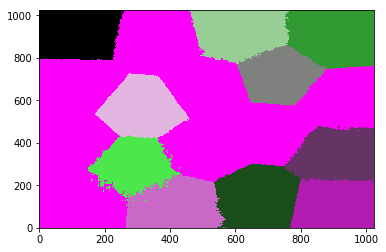

In [32]:
out10 = np.reshape(np.array(km10.labels_), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(10))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

In [18]:
km15 = KMeans(15)
km15.fit(img2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

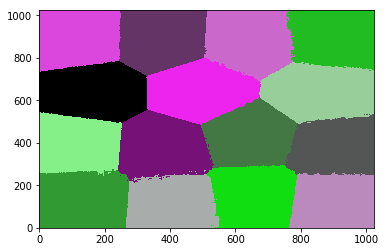

In [18]:
out = np.reshape(np.array(km15.labels_), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(15))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

With indices also used when clustering, as the number of clusters increases the neighborhood information dominates the inherent clustering.